In [1]:
from __future__ import print_function
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer  
from stop_words import get_stop_words  
from nltk.stem.porter import PorterStemmer  
from gensim import corpora, models  
import gensim  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
from sklearn.cluster import KMeans


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
num_clusters = 5;
num_words=5;
remove_word_list=['mm'];


In [3]:
doc_set=[]
fd= open( "data.txt", "r" )    
for line in fd.readlines():      
    doc_set.append(line)

In [4]:
tokenizer = RegexpTokenizer(r'\w+')  

# create English stop words list  
en_stop = get_stop_words('en') 

  
# Create p_stemmer of class PorterStemmer  
p_stemmer = PorterStemmer()  


In [5]:
# list for tokenized documents in loop  
texts = []  
  
# loop through document list  
for i in doc_set:  
      
    
    # clean and tokenize document string  
    raw = i.lower()  
    tokens = tokenizer.tokenize(raw)  
  
    
    # remove stop words from tokens  
    stopped_tokens = [temp for temp in tokens if not temp in en_stop]  
      
    
    # stem tokens  
    #stemmed_tokens = [p_stemmer.stem(temp) for temp in stopped_tokens]  
      
    
    # remove digits
    no_digit= [temp for temp in stopped_tokens if not temp.isdigit()];
    
    # remove single word
    no_single=[temp for temp in no_digit if not (len(temp)==1)];
    
    # remove words if contain elements in remove_word_list
    remove_word=[temp for temp in no_single if not temp in remove_word_list];
    
    # add tokens to list  
    texts.append(remove_word)  

In [6]:
# turn our tokenized documents into a id <-> term dictionary  
dictionary = corpora.Dictionary(texts)  

#print(dictionary.token2id) 
def invert_dict(d):  
    return dict((v,k) for k,v in d.items())  
dictionary_index_word=invert_dict(dictionary.token2id);


# convert tokenized documents into a document-term matrix  
corpus = [dictionary.doc2bow(text) for text in texts]  


tfidf = models.TfidfModel(corpus) # -- initialize a model

corpus_tfidf_list=[];
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    corpus_tfidf_list.append(doc);


numpy_matrix = gensim.matutils.corpus2dense(corpus_tfidf, num_terms=len(dictionary));


numpy_matrix=numpy_matrix.T;

In [7]:
km = KMeans(n_clusters=num_clusters);

km.fit(numpy_matrix);

clusters = km.labels_.tolist();

In [8]:
print("Top terms per cluster:")
print()
centroids = km.cluster_centers_;
temp_centroids=centroids.copy();

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='');
    
    for word_index in range(num_words):
        temp=np.argmax(temp_centroids[i]);
        temp_centroids[i][temp]=np.min(centroids[0])-10;
        print(' %s' % dictionary_index_word[temp], end=',');
    
    
   
    print() #add whitespace
    print() #add whitespace

Top terms per cluster:

Cluster 0 words: accent, style, highlighters, fluorescent, yellow,

Cluster 1 words: set, assorted, color, chisel, quantity,

Cluster 2 words: office, depot, sanford, pack, colors,

Cluster 3 words: marker, tip, black, fine, extra,

Cluster 4 words: point, fine, markers, ultra, ink,



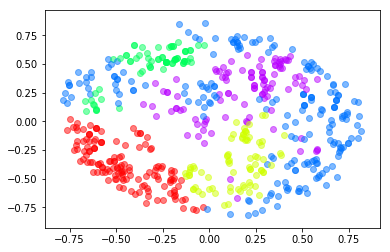

In [10]:
dist = 1 - cosine_similarity(numpy_matrix);


mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1);
pos = mds.fit_transform(dist);
xs, ys = pos[:, 0], pos[:, 1];



cmap = plt.cm.get_cmap("hsv", num_clusters+1);

color_list=[];
for index in range(num_clusters):
    color_list.append(cmap(index));

for index in range(len(corpus)):
    plt.scatter(xs[index], ys[index] ,alpha=0.5,color=color_list[clusters[index]])
plt.show()